In [54]:
import pandas as pd

# 加载数据
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['time'] = pd.to_datetime(data['time'])
    data.set_index('time', inplace=True)
    data.sort_index(inplace=True)
    # 筛选2016年及之后的数据
    data = data['2016':]
    return data

In [55]:
data=load_data('data\BTC-USD.csv')
print(data.describe())
print(data.info())

               open          high           low         close        volume  \
count   3065.000000   3065.000000   3065.000000   3065.000000  3.065000e+03   
mean   18759.763814  19197.320860  18301.553608  18784.087914  3.433846e+10   
std    18229.347021  18656.694295  17774.573504  18252.718345  3.683947e+10   
min      364.331000    374.950000    354.914000    365.662000  2.954080e+07   
25%     4378.062350   4591.630000   4296.675659   4384.188461  3.281648e+09   
50%    10229.150080  10424.055970   9973.087326  10241.608800  2.424931e+10   
75%    29705.776152  30222.530000  29199.070000  29717.558046  5.492820e+10   
max    72961.030000  73628.430000  71333.360000  73087.950000  2.121515e+11   

             SMA_20       RSI_14  
count   3046.000000  3052.000000  
mean   18694.275711    45.748165  
std    18012.210236    18.590100  
min      380.914600     0.204960  
25%     4549.225554    33.078741  
50%    10210.400750    46.310225  
75%    29440.869936    59.109933  
max    6

In [56]:
data.head()

,open,high,low,close,volume,SMA_20,RSI_14
time,,,,,,,
2016-01-01,430.567,436.246,427.515,433.973,4.020336e+07,423.80125,75.610158
2016-01-02,434.334,436.062,431.870,433.307,3.173093e+07,422.55020,64.736750
2016-01-03,433.438,433.743,424.706,429.880,3.117175e+07,419.99215,65.074854
2016-01-04,430.011,434.517,429.084,433.122,3.715623e+07,417.88595,64.686496
2016-01-05,433.091,434.182,429.676,431.945,3.669657e+07,416.38975,65.794225


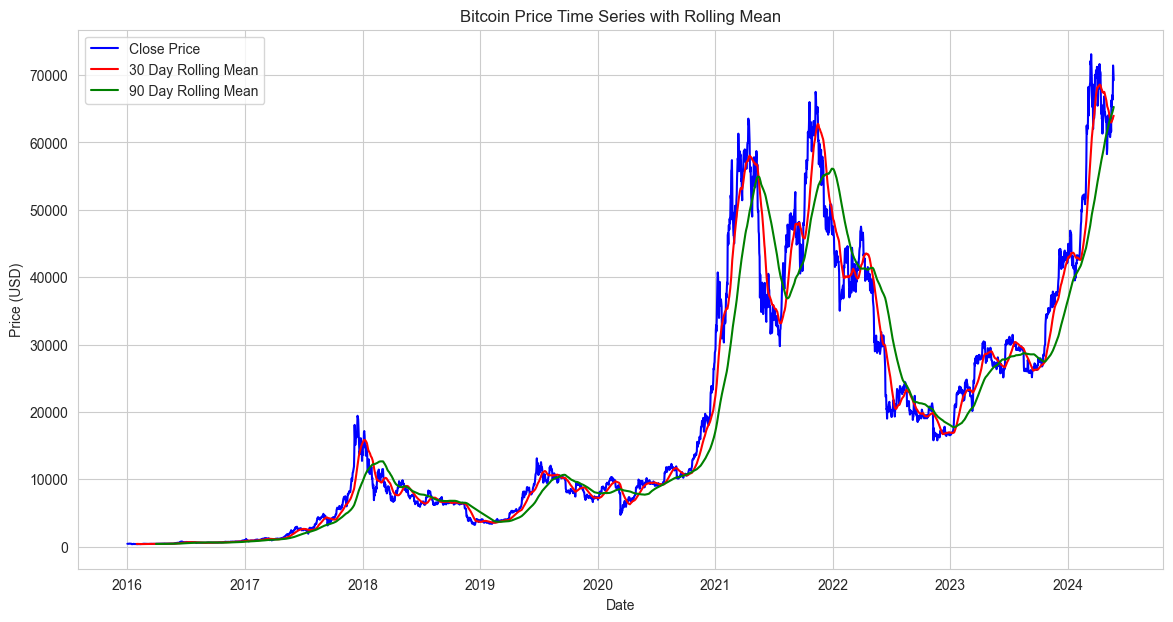

In [57]:
import matplotlib.pyplot as plt

# # 将日期列转换为日期时间格式，并设置为索引
# data['Start'] = pd.to_datetime(data['Start'])
# data.set_index('Start', inplace=True)

# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price', color='blue')

# 计算并绘制30天和90天滚动平均
rolling_mean_30 = data['close'].rolling(window=30).mean()
rolling_mean_90 = data['close'].rolling(window=90).mean()
plt.plot(rolling_mean_30, label='30 Day Rolling Mean', color='red')
plt.plot(rolling_mean_90, label='90 Day Rolling Mean', color='green')

plt.title('Bitcoin Price Time Series with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

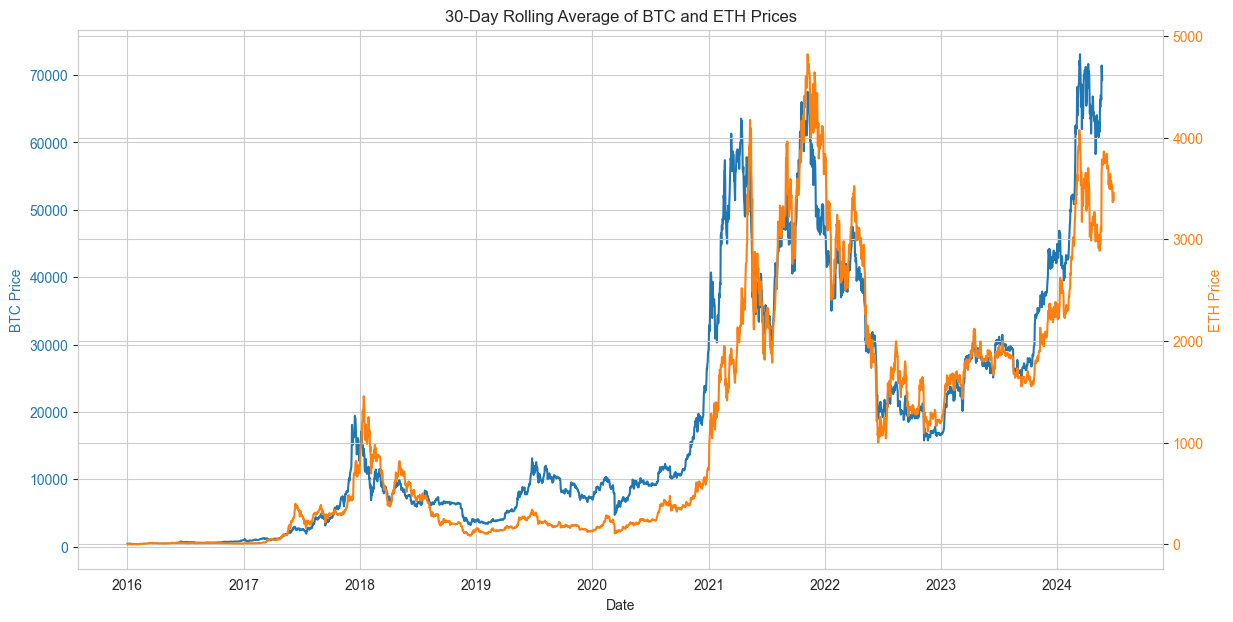

In [58]:

# 数据加载
eth_data=load_data('data/ETH-USD.csv')

fig, ax1 = plt.subplots(figsize=(14, 7))
# 比特币价格使用左侧Y轴
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price', color=color)
ax1.plot(data['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 以太坊价格使用右侧Y轴
ax2 = ax1.twinx()  # 实例化一个共享同一个X轴的第二个Y轴
color = 'tab:orange'
ax2.set_ylabel('ETH Price', color=color)
ax2.plot(eth_data['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('30-Day Rolling Average of BTC and ETH Prices')
plt.show()

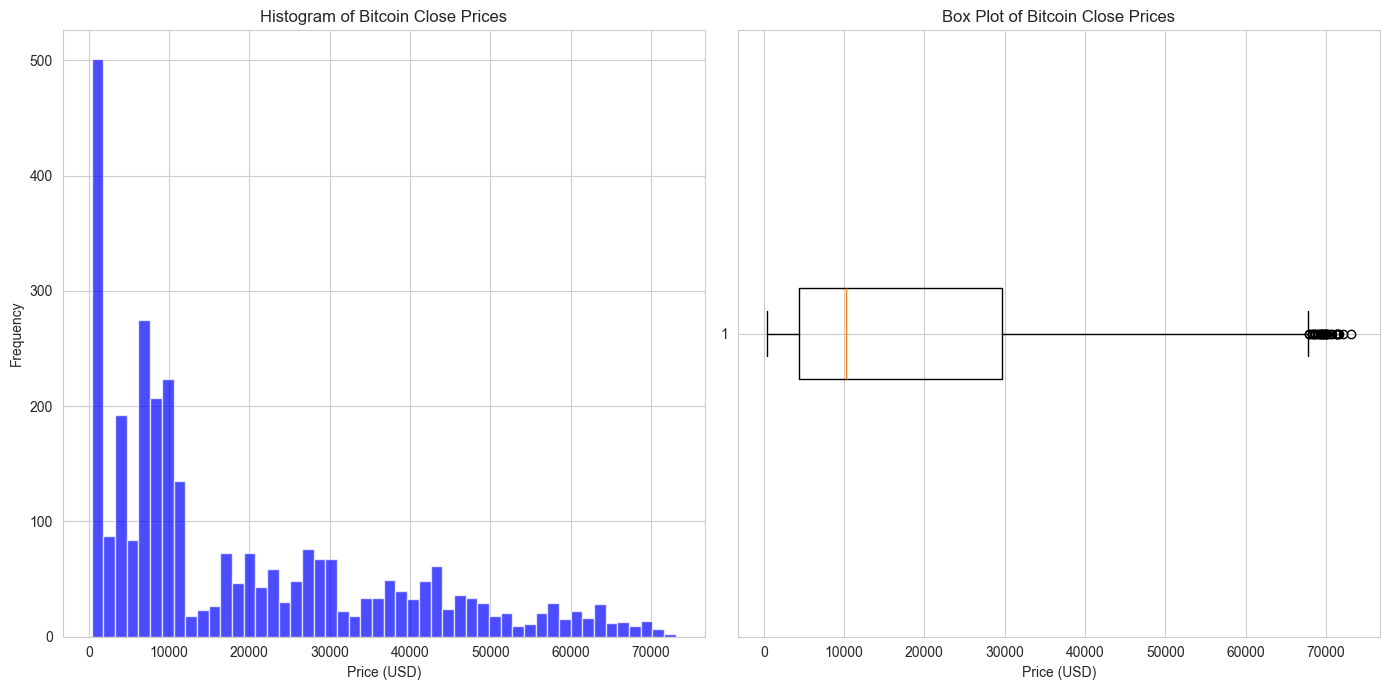

In [59]:
# 绘制直方图和箱型图
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# 直方图
ax[0].hist(data['close'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Histogram of Bitcoin Close Prices')
ax[0].set_xlabel('Price (USD)')
ax[0].set_ylabel('Frequency')

# 箱型图
ax[1].boxplot(data['close'], vert=False)
ax[1].set_title('Box Plot of Bitcoin Close Prices')
ax[1].set_xlabel('Price (USD)')

plt.tight_layout()
plt.show()

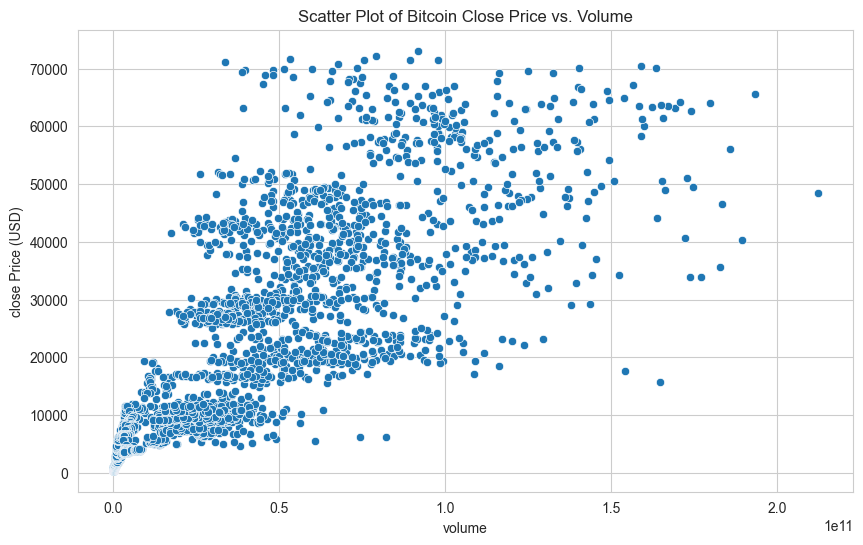

           close    volume
close   1.000000  0.821104
volume  0.821104  1.000000


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 计算收盘价和交易量的相关系数
correlation_matrix = data[['close', 'volume']].corr()

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['volume'], y=data['close'])
plt.title('Scatter Plot of Bitcoin Close Price vs. Volume')
plt.xlabel('volume')
plt.ylabel('close Price (USD)')
plt.show()

# 输出相关系数
print(correlation_matrix)

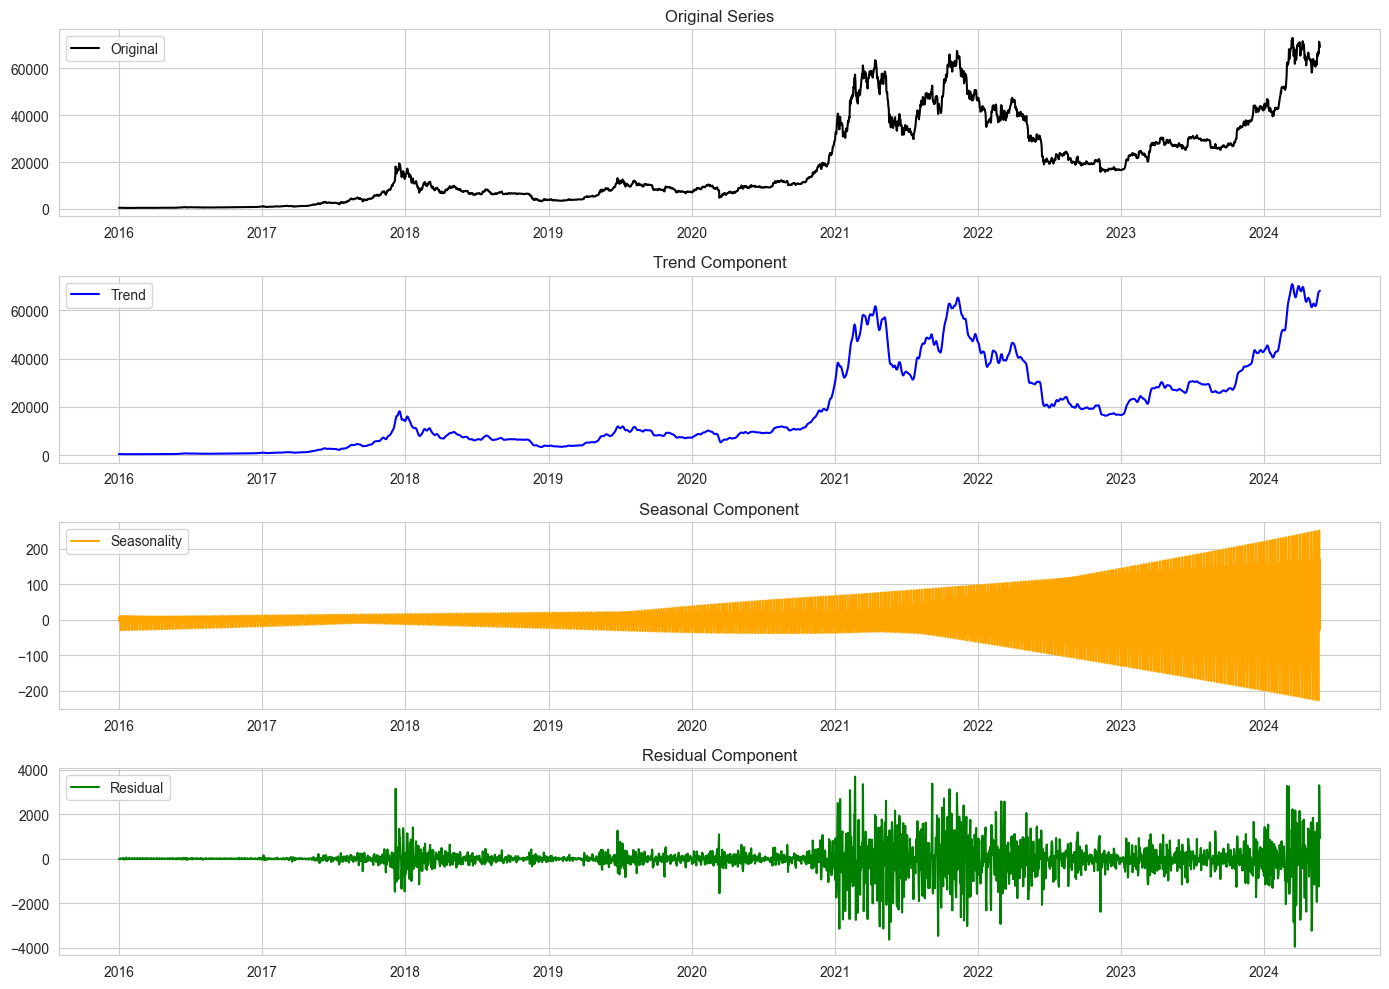

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 假设 df_clean 已经包含了 'date' 和 'btc_Price' 两列
# 将 'date' 列设置为索引
#data.set_index('date', inplace=True)

# 进行STL分解，周期设为365（如果你的数据是按天记录，且周期性现象是一年）
stl = STL(data['close'], seasonal=365)
result = stl.fit()

# 提取分解的结果
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# 绘制分解结果
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data.index, data['close'], label='Original', color='black')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(data.index, trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(data.index, seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(data.index, residual, label='Residual', color='green')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

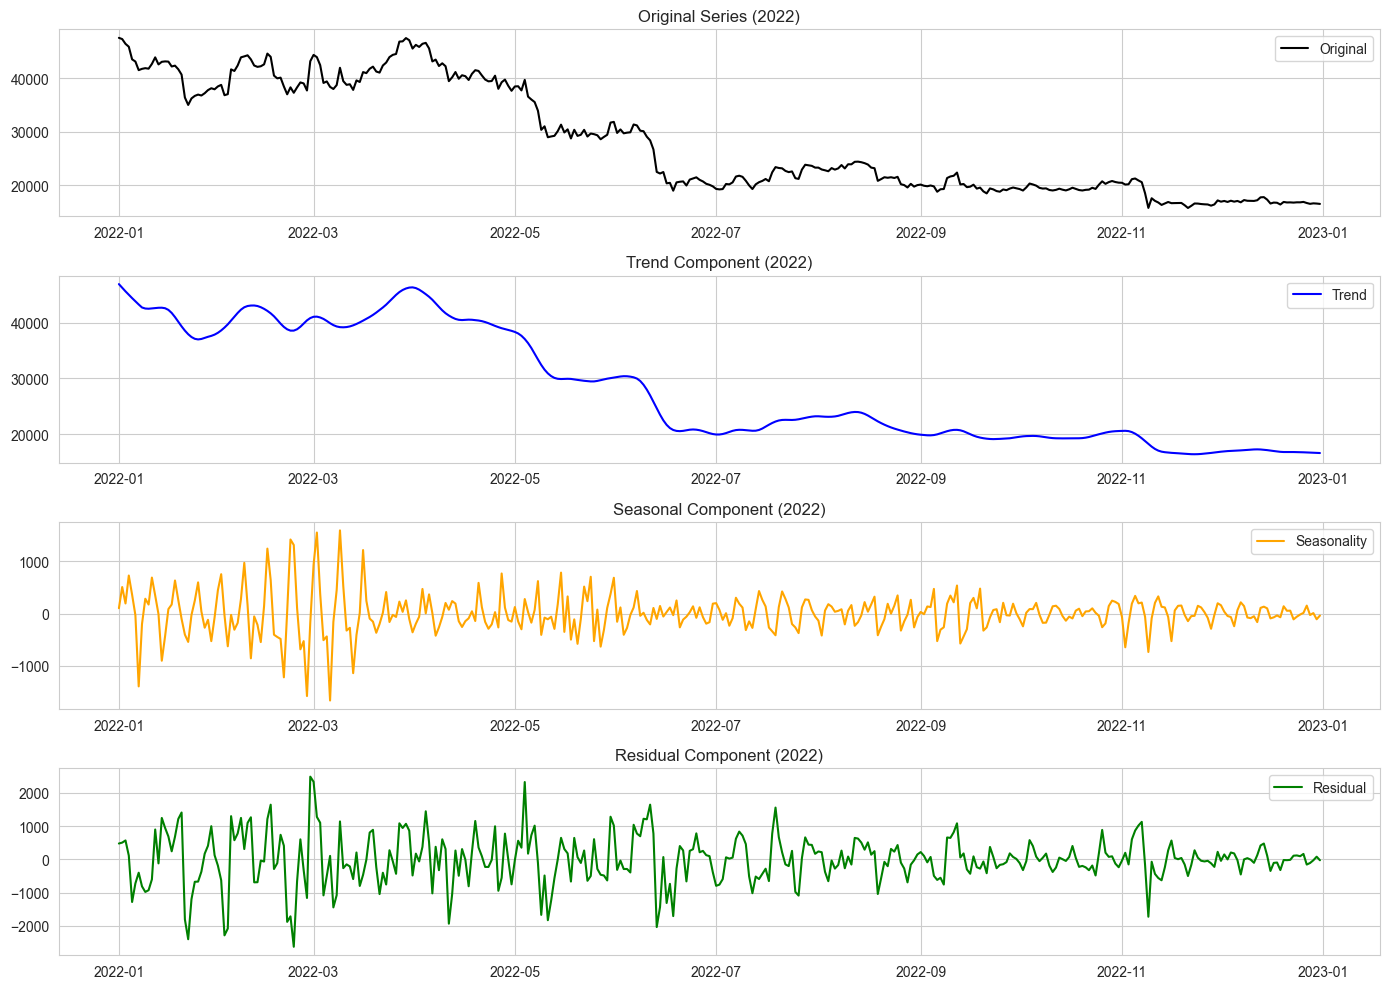

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 假设 df_clean 已经包含了 'date' 和 'btc_Price' 两列
# 首先确保 'date' 列是 datetime 格式

# 过滤2022年的数据
df_2022 = pd.read_csv('data\BTC-USD.csv')
df_2022['time'] = pd.to_datetime(df_2022['time'])
df_2022 = df_2022[(df_2022['time'] >= '2022-01-01') & (df_2022['time'] <= '2022-12-31')]
# 将 'date' 列设置为索引
df_2022.set_index('time', inplace=True)

# 进行STL分解，周期设为365天（或者根据2022年的实际周期性调整）
stl = STL(df_2022['close'], seasonal=7)
result = stl.fit()

# 提取分解的结果
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# 绘制分解结果
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df_2022.index, df_2022['close'], label='Original', color='black')
plt.title('Original Series (2022)')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(df_2022.index, trend, label='Trend', color='blue')
plt.title('Trend Component (2022)')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(df_2022.index, seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component (2022)')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(df_2022.index, residual, label='Residual', color='green')
plt.title('Residual Component (2022)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()